<a href="https://colab.research.google.com/github/aiswarya-sureshkumar/OIBSIP/blob/main/Email%20Spam%20Detection%20with%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Spam Detection with Machine Learning**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
df=pd.read_csv('/content/spam.csv',encoding="ISO_8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop the unnecessary columns
columns_to_drop=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df.drop(columns=columns_to_drop, inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# Rename v1 column to target and v2 column to message
df.rename(columns=dict({"v1":"target","v2":"message"}),inplace=True)
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

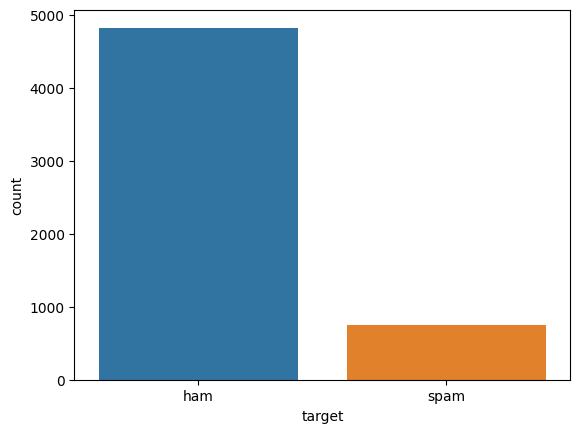

In [10]:
sns.countplot(x='target',data=df)

In [11]:
df.drop_duplicates(inplace=True)
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.reset_index(drop=True,inplace=True)
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will Ì_ b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


In [13]:
df['target']=df['target'].map({'spam':0,'ham':1})
df

,target,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,0,This is the 2nd time we have tried 2 contact u...
5165,1,Will Ì_ b going to esplanade fr home?
5166,1,"Pity, * was in mood for that. So...any other s..."
5167,1,The guy did some bitching but I acted like i'd...


In [14]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
msg=df.message

In [16]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
msg=msg.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
msg

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5164    This is the 2nd time we have tried 2 contact u...
5165               Will Ì_ b going to esplanade fr home ?
5166    Pity , * was in mood for that . So ... any oth...
5167    The guy did some bitching but I acted like i'd...
5168                          Rofl . Its true to its name
Name: message, Length: 5169, dtype: object

In [17]:
# Regular expression - To remove special characters
import re
msg=msg.str.replace('[^a-zA-Z0-9]+',' ')    #^ indicates exclude
msg

<ipython-input-17-6d6b5f12e2d3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  msg=msg.str.replace('[^a-zA-Z0-9]+',' ')    #^ indicates exclude


0       Go until jurong point crazy Available only in ...
1                                Ok lar Joking wif u oni 
2       Free entry in 2 a wkly comp to win FA Cup fina...
3            U dun say so early hor U c already then say 
4       Nah I don t think he goes to usf he lives arou...
                              ...                        
5164    This is the 2nd time we have tried 2 contact u...
5165                   Will b going to esplanade fr home 
5166    Pity was in mood for that So any other suggest...
5167    The guy did some bitching but I acted like i d...
5168                            Rofl Its true to its name
Name: message, Length: 5169, dtype: object

In [18]:
# To collect meaningful words with >3 letters
from nltk.tokenize import word_tokenize
msg=msg.apply(lambda x:' '.join([w for w in word_tokenize(x)if len(w)>=3]))

In [19]:
# Stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
msg=msg.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
msg

0       until jurong point crazi avail onli bugi great...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkts 21st m...
3                      dun say earli hor alreadi then say
4           nah don think goe usf live around here though
                              ...                        
5164    this the 2nd time have tri contact have won th...
5165                                will go esplanad home
5166             piti was mood for that ani other suggest
5167    the guy did some bitch but act like interest b...
5168                                 rofl it true it name
Name: message, Length: 5169, dtype: object

In [20]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
msg=msg.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
msg

0       jurong point crazi avail onli bugi great world...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkts 21st m...
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
                              ...                        
5164    2nd time tri contact 750 pound prize claim eas...
5165                                     go esplanad home
5166                                piti mood ani suggest
5167    guy bitch act like interest buy someth els nex...
5168                                       rofl true name
Name: message, Length: 5169, dtype: object

In [21]:
# Vectorization - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(msg)
data

<5169x6808 sparse matrix of type '<class 'numpy.float64'>'
	with 40072 stored elements in Compressed Sparse Row format>

In [22]:
data.shape

(5169, 6808)

In [23]:
y=df['target'].values
y

array([1, 1, 0, ..., 1, 1, 1])

### **Splitting into Training and Testing data**

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)

### **Model creation and Performance evaluation**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
naive=MultinomialNB()
vector=SVC()
decision=DecisionTreeClassifier(criterion='entropy')
random=RandomForestClassifier()

In [26]:
lst_models=[knn,naive,vector,decision,random]
for i in lst_models:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("******************************************************************")
  print(confusion_matrix(y_test,y_pred))
  print("******************************************************************")
  print(accuracy_score(y_test,y_pred))
  print("******************************************************************")
  print(classification_report(y_test,y_pred))

KNeighborsClassifier(n_neighbors=7)
******************************************************************
[[  24  196]
 [   0 1331]]
******************************************************************
0.8736299161831077
******************************************************************
              precision    recall  f1-score   support

           0       1.00      0.11      0.20       220
           1       0.87      1.00      0.93      1331

    accuracy                           0.87      1551
   macro avg       0.94      0.55      0.56      1551
weighted avg       0.89      0.87      0.83      1551

MultinomialNB()
******************************************************************
[[ 149   71]
 [   0 1331]]
******************************************************************
0.9542230818826564
******************************************************************
              precision    recall  f1-score   support

           0       1.00      0.68      0.81       220
           1      